# Tutorial 7- Python for Data Analysis
---
## Selenium

  - [Part 1](#exercise-1) : Installation
  - [Part 2](#exercise-2) : LinkedIn Login & Profile
  - [Part 3](#exercise-3) : LinkedIn Relations
  - [Bonus](#exercise-bonus) : Portail


<a name="exercise-1">

### Part 1 : Installation
---

In [35]:
#!pip install selenium

In [36]:
#!pip install lxml

In [37]:
#!pip install beautifulsoup4

In [38]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

Create your first driver !

Install the browser driver depending on your browser version : https://www.selenium.dev/documentation/webdriver/getting_started/install_drivers/

Place the exe file in the directory of your jupyterlab directory.
For the latest documentation on selenium : https://www.selenium.dev/documentation/overview/

In [39]:
driver = webdriver.Chrome()
driver.get("https://www.google.com")

In [40]:
driver.quit()

<a name="exercise-2">

### Part 2 : LinkedIn Login
---

1) Find the elements corresponding to the login field and fill them by inspecting the linkedin page

In [41]:
import getpass

In [42]:
driver = webdriver.Chrome("chromedriver")
driver.maximize_window()
driver.get("https://www.linkedin.com/login/")

2) Find two ways of login in : with submit button and keys.

In [43]:
password = getpass.getpass()

········


In [44]:
time.sleep(1)
driver.find_element('id',"username").send_keys("theojaoudet@live.fr")
driver.find_element('id',"password").send_keys(password)
driver.find_element('xpath',"//*[@id=\"organic-div\"]/form/div[3]/button").click()

3) Find the button to go on your profile page and automate the action of clicking.

In [45]:
time.sleep(1)
driver.find_element('link text',"Théo Jaoudet").click()

4) Use a script to scroll the page to the bottom to browse all objects (execute_script function)

In [46]:
time.sleep(1)
driver.execute_script("window.scrollTo(0, 1400);")
time.sleep(1)

5) Use beautifulsoup and process the HTML of the previous scrolled page

In [47]:
from bs4 import BeautifulSoup
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'lxml')

6.1) Extract under the variable name "section" the HTML part of the page corresponding to your experiences using the section ID

In [48]:
section = soup.find_all('li',class_="artdeco-list__item pvs-list__item--line-separated pvs-list__item--one-column")

section = section[3:8]
#print(section)

6.2) As you can see, if you refresh the page the section ID changes, what can you do to always find it back ? Create a function to solve this question.

In [49]:
import numpy as np

7) From this extract part, extract separately experiences and from experiences : companies, period of time, description... using find_all (you might have doubled data but we will filter it after)

In [50]:
listeXp = []
nbXp = 1
listePoste =[]
listeEntreprise = []
listeLieu =[]
listeDates =[]
for i in section:
    poste = i.find_all('span',class_='mr1 t-bold')[0].text
    poste = poste[:int(len(poste)/2)].strip('\n')
    listePoste.append(poste)
    
    entreprise = i.find_all('span',class_='t-14 t-normal')[0].text
    entreprise = entreprise[:int(len(entreprise)/2)].strip('\n')
    listeEntreprise.append(entreprise)
    
    autre = i.find_all('span',class_='t-14 t-normal t-black--light')
    listeAutre = []
    for j in range(1,len(autre)+1):
        temp = autre[-j].text.strip()
        temp = temp[:int(len(temp)/2)]
        listeAutre.append(temp)
    listeLieu.append(listeAutre[0])
    listeDates.append(listeAutre[1])
    
    print("Expérience : ",nbXp)
    print(poste)
    print(entreprise)
    for p in listeAutre:
        print(p)
    print()
    nbXp+=1

Expérience :  1
Chef de projet
DeVinci Junior
Paris, Île-de-France, France
sept. 2022 - aujourd’hui · 3 mois

Expérience :  2
Assistant pour mise en service d'un CRM
GRTgaz · Intérimaire
Bois-Colombes
juil. 2022 · 1 mois

Expérience :  3
Stage ouvrier
Ferme du Pavillon · Stage
Moulins-Engilbert, Bourgogne-Franche-Comté, France
juin 2021 · 1 mois

Expérience :  4
Appui Projet/Ordonnancement
Horisis Conseil · Stage
Paris, Île-de-France, France
juin 2020 - août 2020 · 3 mois

Expérience :  5
Stagiaire de service RH
Horisis Conseil · Stage
Paris, Île-de-France, France
juil. 2017 · 1 mois



8) Create a dataframe named my_linkedin_data and insert all that data inside of it.

In [51]:
indexXp =[]
for i in range(1,nbXp):
    indexXp.append(f"Expérience {i}")

In [52]:
import pandas as pd

my_linkedin_data = pd.DataFrame(list(zip(listePoste,listeEntreprise,listeDates,listeLieu)),columns=['Titre poste','Entreprise','Dates','Lieu'],
                  index=indexXp)
my_linkedin_data

,Titre poste,Entreprise,Dates,Lieu
Expérience 1,Chef de projet,DeVinci Junior,sept. 2022 - aujourd’hui · 3 mois,"Paris, Île-de-France, France"
Expérience 2,Assistant pour mise en service d'un CRM,GRTgaz · Intérimaire,juil. 2022 · 1 mois,Bois-Colombes
Expérience 3,Stage ouvrier,Ferme du Pavillon · Stage,juin 2021 · 1 mois,"Moulins-Engilbert, Bourgogne-Franche-Comté, Fr..."
Expérience 4,Appui Projet/Ordonnancement,Horisis Conseil · Stage,juin 2020 - août 2020 · 3 mois,"Paris, Île-de-France, France"
Expérience 5,Stagiaire de service RH,Horisis Conseil · Stage,juil. 2017 · 1 mois,"Paris, Île-de-France, France"


In [53]:
def getTypeT(x):
    x = x.split('·')
    if(len(x)==1):
        x = "Type absent"
    else:
        x= x[len(x)-1].strip()
    typeC=x
    return typeC
def getTypeE(x):
    x = x.split('·')
    x= x[0].strip()
    typeC=x
    return typeC
def getLengthD(x):
    x = x.split('·')
    x= x[1].strip()
    typeC=x
    return typeC
def getLengthDate(x):
    x = x.split('·')
    x= x[0].strip()
    typeC=x
    return typeC

In [54]:
my_linkedin_data.insert(2,'Type contrat',my_linkedin_data['Entreprise'].map(getTypeT))
my_linkedin_data['Entreprise'] = my_linkedin_data['Entreprise'].map(getTypeE)

my_linkedin_data.insert(4,'Durée',my_linkedin_data['Dates'].map(getLengthD))
my_linkedin_data['Dates'] = my_linkedin_data['Dates'].map(getLengthDate)

my_linkedin_data

,Titre poste,Entreprise,Type contrat,Dates,Durée,Lieu
Expérience 1,Chef de projet,DeVinci Junior,Type absent,sept. 2022 - aujourd’hui,3 mois,"Paris, Île-de-France, France"
Expérience 2,Assistant pour mise en service d'un CRM,GRTgaz,Intérimaire,juil. 2022,1 mois,Bois-Colombes
Expérience 3,Stage ouvrier,Ferme du Pavillon,Stage,juin 2021,1 mois,"Moulins-Engilbert, Bourgogne-Franche-Comté, Fr..."
Expérience 4,Appui Projet/Ordonnancement,Horisis Conseil,Stage,juin 2020 - août 2020,3 mois,"Paris, Île-de-France, France"
Expérience 5,Stagiaire de service RH,Horisis Conseil,Stage,juil. 2017,1 mois,"Paris, Île-de-France, France"


<AxesSubplot:title={'center':'Durée des emplois'}, xlabel='Durée'>

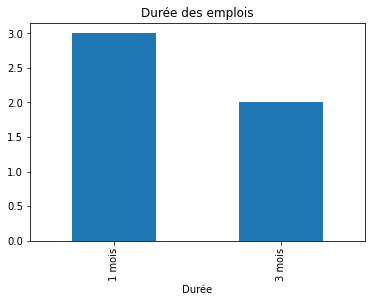

In [55]:
a = my_linkedin_data.groupby('Durée').count()
a['Entreprise'].plot(kind='bar',title='Durée des emplois')

<a name="exercise-3">

### Part 3 : LinkedIn Relations
---

1) Click on the "More relations" button to open your list of relations

In [56]:
time.sleep(1)
driver.execute_script("window.scrollTo(0,0);")
time.sleep(1)
driver.find_element('xpath',"/html/body/div[6]/div[3]/div/div/div[2]/div/div/main/section[1]/div[2]/ul/li/a").click()

In [57]:
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'lxml')
time.sleep(1)

In [58]:
time.sleep(1)
driver.find_element("xpath","//*[@id=\"global-nav\"]/div/nav/ul/li[2]/a").click()
time.sleep(2)
driver.find_element("xpath","/html/body/div[6]/div[3]/div/div/div/div/div[2]/div/div/div/div/div/div/section[1]/div/div[1]").click()
time.sleep(6)

In [59]:
from bs4 import BeautifulSoup
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'lxml')
time.sleep(1)

2) Extract the names and the jobs of your relations on the page.

In [60]:
relations = soup.find_all('li',class_="mn-connection-card artdeco-list")
nbRelations = 1


listeNom = []
listePoste = []

for i in relations:
    nom = i.find_all('span',class_='mn-connection-card__name t-16 t-black t-bold')[-1].text
    nom = nom.strip('\n').strip()
    listeNom.append(nom)
    
    poste = i.find_all('span',class_='mn-connection-card__occupation t-14 t-black--light t-normal')[-1].text
    poste = poste.strip('\n').strip()
    listePoste.append(poste)
    
    print('Relation : ',nbRelations)
    print(nom)
    print(poste)
    print()
    nbRelations+=1

Relation :  1
Tristan Beguet
Chargé d’affaires chez DeVinci Junior ! Etudiant A1-EMLV en International Track (cherche un stage 2 mois, mai 2023)

Relation :  2
Paul Sitbon
Next Level low/no code ; Composable ERP ; Expert Solutions 20x faster ; Digital Transformation Platform ; CRM PIM eCommerce HRIS & Payroll

Relation :  3
Camille Fitoussi
𝗖𝗼𝗮𝗰𝗵 𝗣𝗿𝗼𝗳𝗲𝘀𝘀𝗶𝗼𝗻𝗻𝗲𝗹 𝗖𝗲𝗿𝘁𝗶𝗳𝗶𝗲́𝗲 & 𝗣𝗿𝗮𝘁𝗶𝗰𝗶𝗲𝗻𝗻𝗲 𝗠𝗕𝗧𝗜®️ | Accompagnement de leaders et d'équipes multiculturelles qui changent le 🌎 du travail et de l'éducation

Relation :  4
Louis Bardoul
@Philips Ingénieur commercial IA & informatique de santé.  Français & Américain bilingue. 4A Master M1 Vente @EMLV

Relation :  5
Gabriel Valentino
Étudiant en M1 Cybersécurité et Cloud Computing

Relation :  6
Maé Benaroche
Étudiante à ESILV - Ecole Supérieure d'Ingénieurs Léonard de Vinci

Relation :  7
Wilfried P. TONOU B.
🎒Etudiant en 4e année à ESILV|🕵️‍♂️En recherche de Stage de 4 à 5 mois en Mécanique 3D Conception Simulation bureau d'étude | 🎓 futur ingénieur

In [61]:
indexXp =[]
for i in range(1,nbRelations):
    indexXp.append(f"Relation {i}")

In [62]:
import pandas as pd

my_linkedin_relations = pd.DataFrame(list(zip(listeNom,listePoste)),columns=['Nom','Statut actuel'],
                  index=indexXp)
my_linkedin_relations

,Nom,Statut actuel
Relation 1,Tristan Beguet,Chargé d’affaires chez DeVinci Junior ! Etudia...
Relation 2,Paul Sitbon,Next Level low/no code ; Composable ERP ; Expe...
Relation 3,Camille Fitoussi,𝗖𝗼𝗮𝗰𝗵 𝗣𝗿𝗼𝗳𝗲𝘀𝘀𝗶𝗼𝗻𝗻𝗲𝗹 𝗖𝗲𝗿𝘁𝗶𝗳𝗶𝗲́𝗲 & 𝗣𝗿𝗮𝘁𝗶𝗰𝗶𝗲𝗻𝗻𝗲 𝗠...
Relation 4,Louis Bardoul,@Philips Ingénieur commercial IA & informatiqu...
Relation 5,Gabriel Valentino,Étudiant en M1 Cybersécurité et Cloud Computing
Relation 6,Maé Benaroche,Étudiante à ESILV - Ecole Supérieure d'Ingénie...
Relation 7,Wilfried P. TONOU B.,🎒Etudiant en 4e année à ESILV|🕵️‍♂️En recherch...
Relation 8,Valentin Girold,Student at ESILV - Ecole Supérieure d'Ingénieu...
Relation 9,Sanjay Singh,System Architect
Relation 10,Héléna Nguyen,"Étudiante en M1 Informatique, Objets Connectés..."


3) Find a way to navigate automatically between pages and extract all names, jobs, locationsand store them in a Dataframe

In [63]:
driver.quit()

<a name="exercise-bonus">

### Bonus : Portail
---

Find a way to log in your portal and automatically deposit your notebook on Brightspace !

In [30]:
driver = webdriver.Chrome("chromedriver")
driver.maximize_window()
driver.get("https://devinci-online.brightspace.com/d2l/home")

In [31]:
password = getpass.getpass() 

········


In [32]:
time.sleep(1)
driver.find_element('id',"userNameInput").send_keys("theo.jaoudet@edu.devinci.fr")
driver.find_element('id',"passwordInput").send_keys(password)
driver.find_element('id',"submitButton").click()

In [66]:
time.sleep(1)
driver.execute_script("window.scrollTo(0,400);")
time.sleep(1)
driver.find_element('link text',"Python for data analysis - MESIIN471622, MESIIN471622, S07").click()

In [ ]:
time.sleep(1)
driver.find_element('link text',"Activités").click()
time.sleep(1)
driver.find_element('link text',"Devoirs").click()
